<br><br><br><br><br>

# uproot: array-based ROOT I/O

<br><br><br><br><br>

In [3]:
# In uproot, files are presented with the same interface as Python dicts, including subdirectores.

import uproot
file = uproot.open("http://scikit-hep.org/uproot/examples/nesteddirs.root")
file.keys()

# Exercise: how many objects named "tree" does this file contain?
# 
# (https://uproot.readthedocs.io/en/latest/root-io.html#uproot-rootio-rootdirectory)

[b'one;1', b'three;1']

In [4]:
# TTrees are also presented like Python dicts.

events = uproot.open("http://scikit-hep.org/uproot/examples/Zmumu.root")["events"]
events.keys()

[b'Type',
 b'Run',
 b'Event',
 b'E1',
 b'px1',
 b'py1',
 b'pz1',
 b'pt1',
 b'eta1',
 b'phi1',
 b'Q1',
 b'E2',
 b'px2',
 b'py2',
 b'pz2',
 b'pt2',
 b'eta2',
 b'phi2',
 b'Q2',
 b'M']

<p style="font-size: 2em">Three basic ways to get data:</p>

<table width="100%" style="font-size: 1.25em"><tr>
    <td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Direct</p>
        <p>Read the file and return an array.</p>
        <ul>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#id11">TBranch.array</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#array">TTree.array</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#arrays">TTree.arrays</a></li>
        </ul>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Lazy</p>
        <p>Get an object that reads on demand.</p>
        <ul>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#id13">TBranch.lazyarray</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#lazyarray">TTree.lazyarray</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#lazyarrays">TTree.lazyarrays</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/opening-files.html#uproot-lazyarray-and-lazyarrays">uproot.lazyarray</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/opening-files.html#uproot-lazyarray-and-lazyarrays">uproot.lazyarrays</a></li>
        </ul>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Iterative</p>
        <p>Read arrays in batches of entries.</p>
        <ul>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/ttree-handling.html#iterate">TTree.iterate</a></li>
            <li style="margin-bottom: 0.3em"><a href="https://uproot.readthedocs.io/en/latest/opening-files.html#uproot-iterate">uproot.iterate</a></li>
        </ul>
    </td>
</tr></table>

In [5]:
# Direct:

events.array("E1")

array([82.20186639, 62.34492895, 62.34492895, ..., 81.27013558,
       81.27013558, 81.56621735])

In [13]:
# Lazy:

array = events.lazyarray("E1", entrysteps=500)
print([len(x) for x in array.chunks])

array

[500, 500, 500, 500, 304]


<ChunkedArray [82.2018663875 62.3449289481 62.3449289481 ... 81.2701355756 81.2701355756 81.5662173543] at 0x7f3aa31752e8>

In [10]:
# Iterative:

for chunk in events.iterate("E1", entrysteps=500):
    print(len(chunk[b"E1"]), chunk[b"E1"][:5])

500 [82.20186639 62.34492895 62.34492895 60.62187459 41.82638891]
500 [45.7959062  45.7108209  98.03548137 53.53706097 53.53706097]
500 [31.4488924  31.4488924  31.39073377 64.85457285 46.92904281]
500 [88.35872379 52.5560163  52.5560163  52.38402383 75.34015706]
304 [46.0752809  46.0752809  45.93225789 51.01950403 84.91115834]


<p style="font-size: 2em">Advantages and disadvantages of each:</p>

<table width="100%" style="font-size: 1.25em"><tr>
    <td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Direct</p>
        <p>Simple; most libraries will recognize the Numpy array you get back.</p>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Lazy</p>
        <p>Transparently work on data too large to fit into memory.</p>
    </td><td width="33%" style="vertical-align: top">
        <p style="font-weight: bold; font-size: 1.5em; margin-bottom: 0.5em">Iterative</p>
        <p>Control the loading of data into and out of memory.</p>
    </td>
</tr></table>

In [20]:
# Exercise: compute numpy.sqrt(E1**2 - px1**2 - py1**2 - pz1**2) in all three modes.
# 
# (https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

import numpy

arrays = events.arrays(["E1", "p[xyz]1"], namedecode="utf-8")
E1, px1, py1, pz1 = arrays["E1"], arrays["px1"], arrays["py1"], arrays["pz1"]

result = numpy.sqrt(E1**2 - px1**2 - py1**2 - pz1**2)
result

array([0.10565837, 0.10565839, 0.10565839, ..., 0.10565838, 0.10565838,
       0.10565833])

<br><br><br><br><br>

## Application

<br><br><br><br><br>

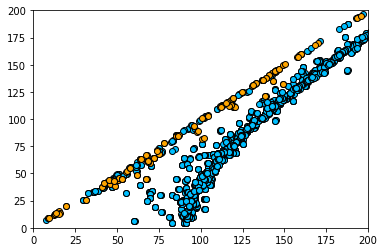

In [54]:
# Let's build a neural network! First, though, we need to set up a problem.

# 2-dimensional for simplicity (easier to visualize and we don't have much data).
E1, E2, px1, py1, pz1, px2, py2, pz2, Q1, Q2 = events.arrays(["E[12]", "p[xyz][12]", "Q[12]"], outputtype=tuple)
E = (E1 + E2)
p = numpy.sqrt((px1 + px2)**2 + (py1 + py2)**2 + (pz1 + pz2)**2)

# Need to predict opposite sign (deepskyblue) vs same sign (orange) using E and p.
%matplotlib inline
import matplotlib.pyplot
matplotlib.pyplot.scatter(E[Q1 != Q2], p[Q1 != Q2], c="deepskyblue", edgecolor="black");
matplotlib.pyplot.scatter(E[Q1 == Q2], p[Q1 == Q2], c="orange", edgecolor="black");
matplotlib.pyplot.xlim(0, 200);
matplotlib.pyplot.ylim(0, 200);

In [38]:
import torch                             # transform inputs to fit PyTorch's expected shape and type
X = torch.from_numpy(numpy.dstack([E, p])[0].astype(numpy.float32))
y = torch.from_numpy((Q1 != Q2).astype(numpy.float32).reshape(-1, 1))

neural_network = torch.nn.Sequential(    # the neural network topology:
    torch.nn.Linear(2, 5),               # input → hidden: 2 dimensions → 5 dimensions
    torch.nn.Sigmoid(),                  # non-linearity applied to each of the 5 components
    torch.nn.Linear(5, 1))               # hidden → output: 5 dimensions → 1 dimension

loss_fn = torch.nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adam(neural_network.parameters(), lr=0.01)

for i in range(1000):                    # iterate 1000 times to minimize loss: y_pred - y
    y_pred = neural_network(X)           # neural_network is a function: X ↦ y
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

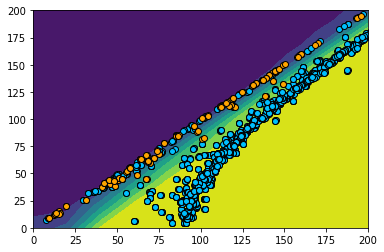

In [53]:
grid_of_points = numpy.dstack(numpy.mgrid[0:220:20, 0:220:20].astype(numpy.float32))
Z = neural_network(torch.from_numpy(grid_of_points)).detach().numpy().reshape(grid_of_points.shape[:2])
matplotlib.pyplot.contourf(grid_of_points[:, :, 0], grid_of_points[:, :, 1], Z);
matplotlib.pyplot.scatter(E[Q1 != Q2], p[Q1 != Q2], c="deepskyblue", edgecolor="black");
matplotlib.pyplot.scatter(E[Q1 == Q2], p[Q1 == Q2], c="orange", edgecolor="black");
matplotlib.pyplot.xlim(0, 200);
matplotlib.pyplot.ylim(0, 200);

In [57]:
# Now do it from a sample of jagged arrays (more than one element per event).

events2 = uproot.open("http://scikit-hep.org/uproot/examples/HZZ.root")["events"]
E, px, py, pz, q = events2.arrays(["Muon_E", "Muon_P[xyz]", "Muon_Charge"], outputtype=tuple)

E, px, py, pz, q

(<JaggedArray [[54.7795 39.401695] [31.690445] [54.739788 47.488857] ... [62.39516] [174.20863] [69.55621]] at 0x7f39a05259e8>,
 <JaggedArray [[-52.899456 37.73778] [-0.81645936] [48.98783 0.8275667] ... [-29.756786] [1.1418698] [23.913206]] at 0x7f39a0525a90>,
 <JaggedArray [[-11.654672 0.6934736] [-24.404259] [-21.723139 29.800508] ... [-15.303859] [63.60957] [-35.665077]] at 0x7f39a0525f98>,
 <JaggedArray [[-8.160793 -11.307582] [20.199968] [11.168285 36.96519] ... [-52.66375] [162.17632] [54.719437]] at 0x7f39a0525da0>,
 <JaggedArray [[1 -1] [1] [1 -1] ... [-1] [-1] [-1]] at 0x7f39a04fb2e8>)

<br><br><br><br><br>

## Caching

<br><br><br><br><br>